In [39]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import geopandas as gpd
from earthtext.osm import osm
from earthtext.osm import multilabel
import os
import xarray as xr

In [8]:
master_index = "/opt/data/clay-california-worldcover-rgbnir-vvvh-chips/california-worldcover-chips.fgb"
osmobjs_folder = "/opt/data/california-worldcover-chips/osm"
imgs_folder    = "/opt/data/clay-california-worldcover-rgbnir-vvvh-chips/chips"
iosdata = multilabel.ImageOSMData(imgs_folder=imgs_folder, osmobjs_folder=osmobjs_folder, master_index=master_index).init_index()
iosdata.m['identifier'] = iosdata.m.index

In [11]:
iosdata.m.head()

,col,row,geometry,identifier
272274b1ba17e,131584,119552,"POLYGON ((-114.01333 32.01600, -114.01333 32.0...",272274b1ba17e
257760bda8ca7,131584,119296,"POLYGON ((-114.01333 32.03733, -114.01333 32.0...",257760bda8ca7
0630b39477419,131328,119296,"POLYGON ((-114.03467 32.03733, -114.03467 32.0...",0630b39477419
166f6e23d38eb,131328,119552,"POLYGON ((-114.03467 32.01600, -114.03467 32.0...",166f6e23d38eb
0cb98e9e9788e,131072,119552,"POLYGON ((-114.05600 32.01600, -114.05600 32.0...",0cb98e9e9788e


In [13]:
iosdata.m.to_file("/opt/data/clay-california-worldcover-rgbnir-vvvh-chips/california-worldcover-chips.geojson")

In [28]:
esawc_folder = "/opt/data/clay-california-worldcover-rgbnir-vvvh-chips/california-worldcover-chips/esaworldcover-2020"

In [174]:
from rlxutils import subplots

def show(self, z):
        for ax, i in subplots(5, n_cols=5, usizex=3.5):
            if i==0:
                rgbimg = np.transpose(self.img[:3],[1,2,0]).copy()
                a,b = np.percentile(rgbimg, [5,99])
                rgbimg /= b
                rgbimg[rgbimg>1]=1
                plt.imshow(rgbimg)
                plt.title(self.chip_id)
            elif i==4:
                plt.imshow(z, vmin=0, vmax=110, cmap=plt.cm.tab20, interpolation="none")
                plt.title("esa world cover")
                plt.colorbar()
            else:
                _x = self.img[i+2]
                a,b = np.percentile(_x, [5,95])
                plt.imshow(_x, vmin=a, vmax=b)
                plt.colorbar()
            plt.axis("off")

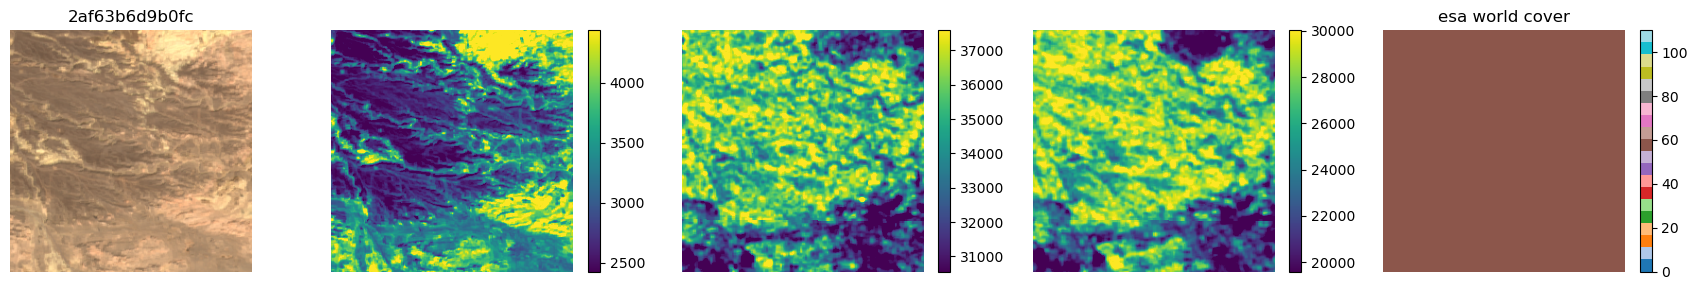

In [196]:
while True:
    c = iosdata.sample_chip()
    fname = f"{esawc_folder}/{c.chip_id}.tif"
    if os.path.isfile(fname):
        break

with xr.open_dataarray(fname) as z:
    esawc = z.data.copy()
c.read_img()
show(c,esawc[0])

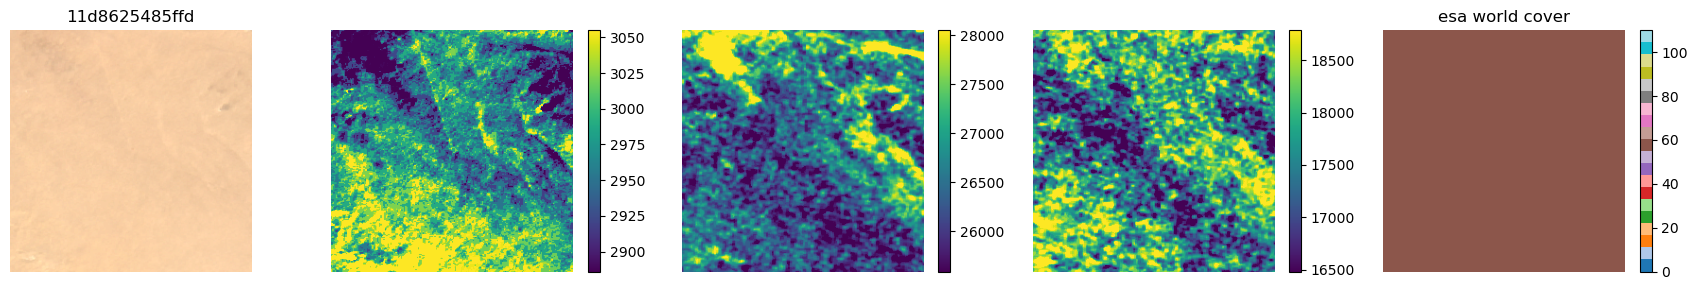

In [188]:
while True:
    c = iosdata.sample_chip()
    fname = f"{esawc_folder}/{c.chip_id}.tif"
    if os.path.isfile(fname):
        break

with xr.open_dataarray(fname) as z:
    esawc = z.data.copy()
c.read_img()
show(c,esawc[0])

In [193]:
z = gpd.read_parquet("/opt/data/california-worldcover-chips/california-worldcover-chips-osm.parquet")
print (z.shape)
z.head()

(92440, 4)


,col,row,geometry,chip_id
1796,122624,111104,"POLYGON ((-114.76000 32.72000, -114.76000 32.7...",2d020602331e4
1797,122624,110848,"POLYGON ((-114.76000 32.74133, -114.76000 32.7...",34c5edf7ed602
1798,122368,110848,"POLYGON ((-114.78133 32.74133, -114.78133 32.7...",370214ce19e1d
1799,122368,111104,"POLYGON ((-114.78133 32.72000, -114.78133 32.7...",16ee69375084b
1801,122112,110848,"POLYGON ((-114.80267 32.74133, -114.80267 32.7...",371eeed5e3259


In [194]:
z = gpd.read_parquet("/opt/data/california-worldcover-chips/california-worldcover-chips-osm-multilabels.parquet")
print (z.shape)
z.head()

(83609, 8)


,onehot_count,onehot_area,onehot_length,string_labels,col,row,geometry,split
chip_id,,,,,,,,
193c3415fc237,"[24, 24, 1344, 388, 472, 21, 453, 2, 8, 0, 0, ...","[58033.967200952815, 58033.967200952815, 23937...","[4913.205774298301, 4913.205774298301, 74943.4...","[amenity=*, amenity=parking, building=*, build...",78080,96000,"POLYGON ((-118.47200 33.97867, -118.47200 34.0...",train
1639b12583426,"[148, 148, 4171, 1245, 1891, 52, 938, 13, 32, ...","[160073.78667008967, 160073.78667008967, 80191...","[20966.344659970102, 20966.344659970102, 24881...","[amenity=*, amenity=parking, building=*, build...",78080,95744,"POLYGON ((-118.47200 34.00000, -118.47200 34.0...",train
253904d963d6a,"[65, 65, 200, 104, 76, 0, 18, 2, 0, 0, 0, 0, 0...","[101980.95118259436, 101980.95118259436, 71246...","[10597.989172272657, 10597.989172272657, 16664...","[amenity=*, amenity=parking, building=*, build...",77824,95744,"POLYGON ((-118.49333 34.00000, -118.49333 34.0...",train
00530dca88d4a,"[9, 9, 4897, 688, 4026, 0, 172, 10, 1, 0, 0, 0...","[17637.908172952746, 17637.908172952746, 10930...","[1925.4953839123748, 1925.4953839123748, 32065...","[amenity=*, amenity=parking, building=*, build...",77824,95488,"POLYGON ((-118.49333 34.02133, -118.49333 34.0...",train
0e554bbdbe661,"[80, 80, 4358, 1262, 2386, 59, 597, 27, 27, 0,...","[131950.60085068244, 131950.60085068244, 98472...","[13536.03447682216, 13536.03447682216, 283601....","[amenity=*, amenity=parking, building=*, build...",78080,95488,"POLYGON ((-118.47200 34.02133, -118.47200 34.0...",train


In [191]:
z = gpd.read_file("/opt/data/california-worldcover-chips/california-worldcover-chips.fgb")
z.head()

,col,row,geometry
0,131584,119552,"POLYGON ((-114.01333 32.01600, -114.01333 32.0..."
1,131584,119296,"POLYGON ((-114.01333 32.03733, -114.01333 32.0..."
2,131328,119296,"POLYGON ((-114.03467 32.03733, -114.03467 32.0..."
3,131328,119552,"POLYGON ((-114.03467 32.01600, -114.03467 32.0..."
4,131072,119552,"POLYGON ((-114.05600 32.01600, -114.05600 32.0..."


In [192]:
z.shape

(111920, 3)